# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ARMA
from statsmodels.tools.eval_measures import rmse

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

sensor.isnull().mean() * 100

# there is no missing data

attitude.roll         0.0
attitude.pitch        0.0
attitude.yaw          0.0
gravity.x             0.0
gravity.y             0.0
gravity.z             0.0
rotationRate.x        0.0
rotationRate.y        0.0
rotationRate.z        0.0
userAcceleration.x    0.0
userAcceleration.y    0.0
userAcceleration.z    0.0
dtype: float64

How many rows and columns are in our data?

In [5]:
# Your code here:

sensor.shape

# there are 1751 rows and 12 columns

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:

pd.DatetimeIndex(pd.date_range(start=pd.to_datetime('1/1/2018 00:00am', dayfirst=True), 
                                                end=pd.to_datetime('1/1/2018 00:29:10am', dayfirst=True), 
                                                periods=len(sensor)), freq = 'infer')

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:

sensor = sensor.set_index(pd.DatetimeIndex(pd.date_range(start=pd.to_datetime('1/1/2018 00:00am', dayfirst=True), 
                                                end=pd.to_datetime('1/1/2018 00:29:10am', dayfirst=True), 
                                                periods=len(sensor)), freq = 'infer'))

sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

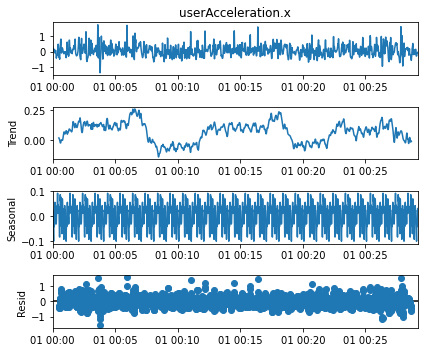

In [8]:
serie_acceleration_x = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'],
                                        period=60, model = 'additive')

matplotlib.rcParams['figure.figsize'] = (6, 5)
serie_acceleration_x.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

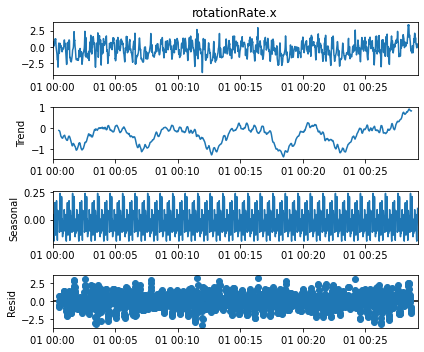

In [9]:
serie_rotation_x = sm.tsa.seasonal_decompose(sensor['rotationRate.x'],
                                        period=60, model = 'additive')

matplotlib.rcParams['figure.figsize'] = (6, 5)
serie_rotation_x.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

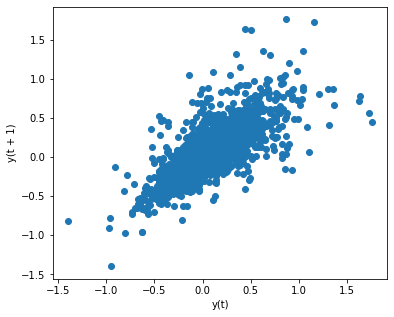

In [10]:
# Your code here:

pd.plotting.lag_plot(sensor['userAcceleration.x']);

Create a lag plot for `rotationRate.x`

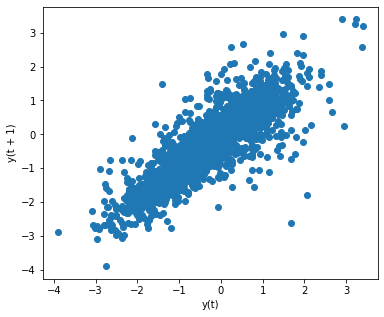

In [11]:
# Your code here:

pd.plotting.lag_plot(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

In [12]:
# Your conclusions here:

# it seems both userAcceleration.x and rotationRate.x are distribuited in a similar way

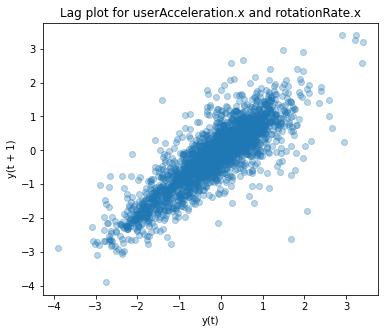

In [13]:
pd.plotting.lag_plot(sensor[['userAcceleration.x', 'rotationRate.x']], alpha=0.3);
plt.title('Lag plot for userAcceleration.x and rotationRate.x');

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [14]:
# Your code here:

adfuller(sensor['userAcceleration.x'])

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [15]:
adfuller(sensor['rotationRate.x'])

(-5.269860625086428,
 6.320230335911989e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

In [16]:
# Your conclusions here:

# for both ADF Statisc (-17 and -5)
# the more negative this statistic, 
# the more likely we are to reject the null hypothesis (we have a stationary dataset)

# for both test p-value is too small 
# from which we can infer whether or not our dataset is stationary

# p-value > 0.05: Fail to reject the null hypothesis (H0), 
# the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), 
# the data does not have a unit root and is stationary.

# therefore, we can fail to reject the null hypothesis 
# and in turn that the time series is non-stationary.

# both series are stationaries

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [17]:
train = sensor.iloc[0:1741]['userAcceleration.x']

test = sensor.iloc[1742:-1]['userAcceleration.x']

In [18]:
# Your code here:

arma_model = ARMA(train, order=(2, 1))

arma_model_fit = arma_model.fit(disp=False)

/Users/anahiolmos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [19]:
predict = arma_model_fit.predict(start=0, end=9)
predict

2018-01-01 00:00:00    0.063742
2018-01-01 00:00:01    0.239253
2018-01-01 00:00:02    0.127265
2018-01-01 00:00:03   -0.068711
2018-01-01 00:00:04    0.023542
2018-01-01 00:00:05    0.257242
2018-01-01 00:00:06    0.099381
2018-01-01 00:00:07    0.035967
2018-01-01 00:00:08    0.069458
2018-01-01 00:00:09    0.071279
Freq: S, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [20]:
# Your code here:

from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(sensor.loc['2018-01-01 00:29:01':'2018-01-01 00:29:10']['userAcceleration.x'], predict)

0.2529214255105748

In [25]:
sensor.loc['2018-01-01 00:029:01':'2018-01-01 00:29:10']['userAcceleration.x']

2018-01-01 00:29:01    0.149749
2018-01-01 00:29:02    0.038461
2018-01-01 00:29:03   -0.169175
2018-01-01 00:29:04   -0.300361
2018-01-01 00:29:05   -0.270174
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Freq: S, Name: userAcceleration.x, dtype: float64